## Introduction
In this notebook you will download and preprocess the data for the liver and liver tumor segmentation:<br />
The data is provided by the medical segmentation decathlon (http://medicaldecathlon.com/)<br /> (Data License: https://creativecommons.org/licenses/by-sa/4.0/)<br />

You can directly download the original cardiac MRIs and segmentation maps from: <br />
https://drive.google.com/file/d/1wEB2I6S6tQBVEPxir8cA5kFB8gTQadYY/view?usp=sharing

As this dataset has over 26GB we provide a resampled version of it. The new scans are of shape (256x256xZ), where Z is varying and reduce the size of the dataset to 2.5GB

It is directly included in this directory


In [33]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

## Inspection:
Let's inspect some sample data

We do not need to preprocess this dataset as the necessary steps are directly performed by torchio during training

In [34]:
root = Path("Task03_Liver_rs/imagesTr/")
label = Path("Task03_Liver_rs/labelsTr/")

We start with a helper function which automatically replaces "imagesTr" with "labelsTr" in the filepaths so that we can easily switch between CT images and label masks

In [35]:
def change_img_to_label_path(path):
    """
    Replaces imagesTr with labelsTr
    """
    parts = list(path.parts)  # get all directories within the path
    parts[parts.index("imagesTr")] = "labelsTr"  # Replace imagesTr with labelsTr
    return Path(*parts)  # Combine list back into a Path object


In [36]:
sample_path = list(root.glob("liver*"))[0]  # Choose a subject
sample_path_label = change_img_to_label_path(sample_path)

Load NIfTI and extract image data

In [37]:
data = nib.load(sample_path)
label = nib.load(sample_path_label)

ct = data.get_fdata()
mask = label.get_fdata().astype(int)  # Class labels should not be handled as float64

In [38]:
nib.aff2axcodes(data.affine)

('R', 'A', 'S')

<IPython.core.display.Javascript object>


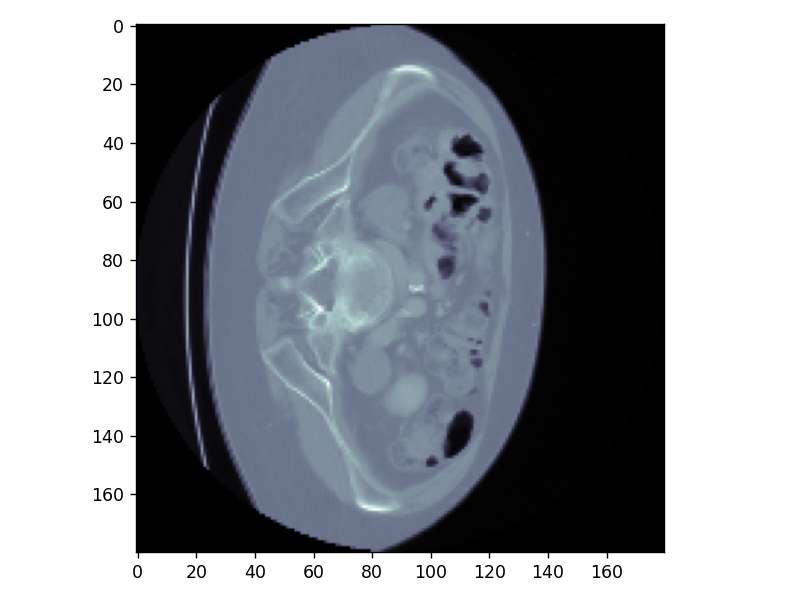

In [40]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(ct.shape[2]):  # Axial view
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5,cmap='autumn')
    # plt.axis("off")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation




In [ ]:
HTML(animation.to_html5_video())